<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/mlcomputerVS/blob/main/laab777.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage
from skimage.feature import hog
from skimage.io import imread
from os import listdir
from os.path import isfile, join
import numpy as np
from sklearn.decomposition import PCA
import zipfile
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

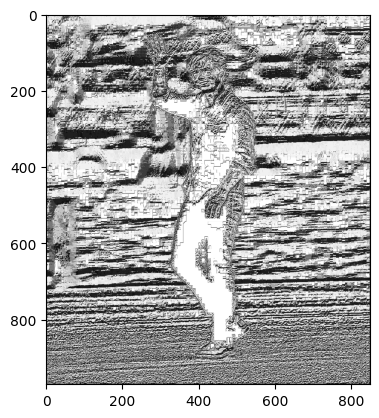

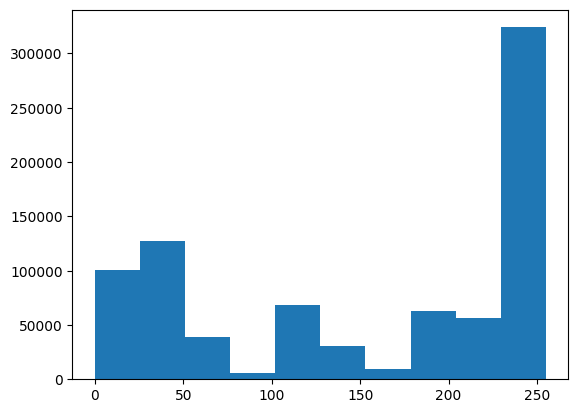

In [33]:
img=cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_def1=skimage.feature.local_binary_pattern(img, 8, 1, method='default')

plt.figure()
plt.imshow(lbp_def1, cmap='gray')
plt.show()

plt.figure()
plt.hist(lbp_def1.reshape(-1))
plt.show()

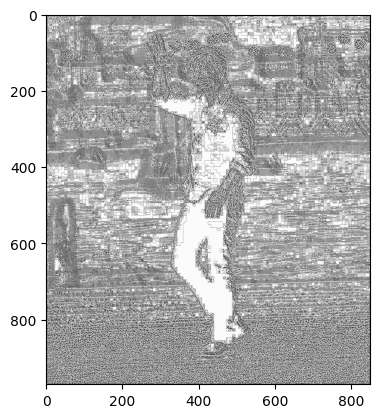

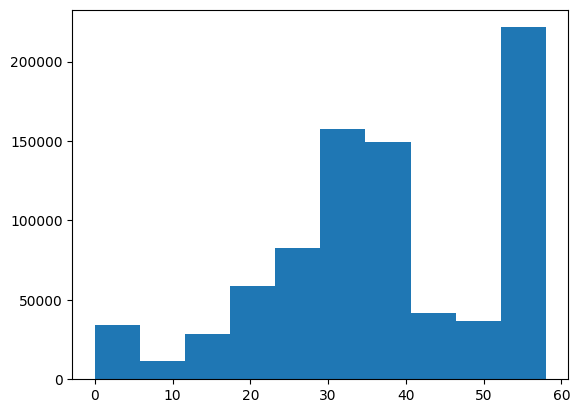

In [ ]:
lbp_nuni=skimage.feature.local_binary_pattern(img, 8, 1, method='nri_uniform')
plt.figure()
plt.imshow(lbp_nuni, cmap='gray')
plt.show()
plt.figure()
plt.hist(lbp_nuni.reshape(-1))
plt.show()

طول ما با این فیلتر به نسبت دیفالت تقریبا یک پنجم کاهش یافته است

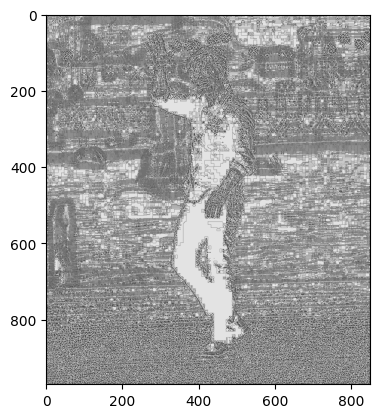

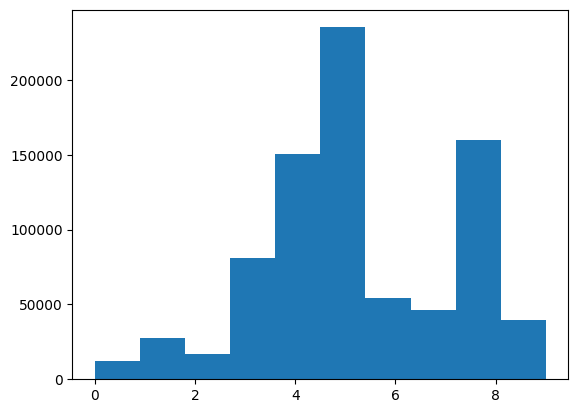

In [ ]:
lbp_uni=skimage.feature.local_binary_pattern(img, 8, 1, method='uniform')
plt.figure()
plt.imshow(lbp_uni, cmap='gray')
plt.show()
plt.figure()
plt.hist(lbp_uni.reshape(-1))
plt.show()

همانطور که میبیینیم و در پیش گذارش هم گفته بودیم با کرنل uniform  اندازه به شدت کاهش می ِابد و میبینیم که ماکز طول به 9 رسیده است

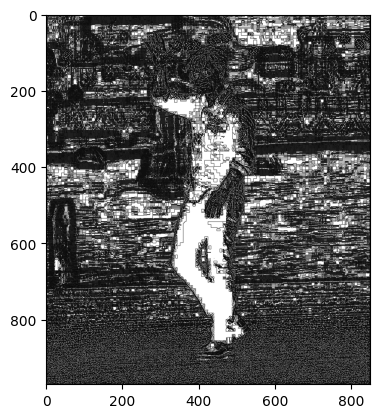

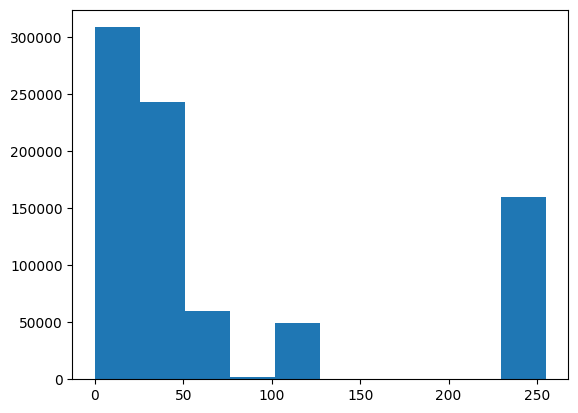

In [ ]:
lbp_ror=skimage.feature.local_binary_pattern(img, 8, 1, method='ror')
plt.figure()
plt.imshow(lbp_ror, cmap='gray')
plt.show()
plt.figure()
plt.hist(lbp_ror.reshape(-1))
plt.show()

این فیلتر نیز همانند دیفالت میباشد

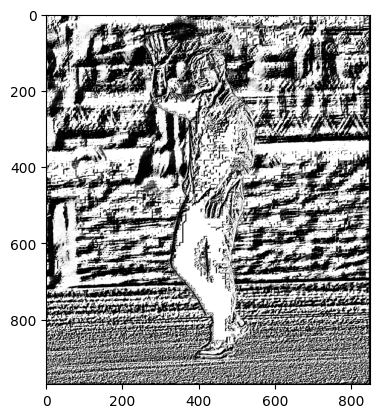

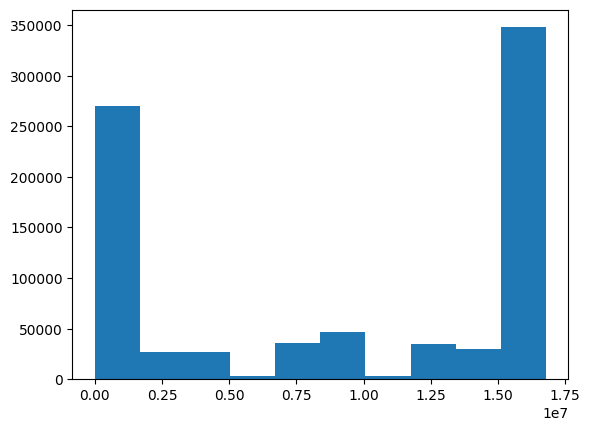

In [ ]:
lbp_def2=skimage.feature.local_binary_pattern(img, 24, 3, method='default')
plt.figure()
plt.imshow(lbp_def2, cmap='gray')
plt.show()
plt.figure()
plt.hist(lbp_def2.reshape(-1))
plt.show()

با بزرگتر کردن پارامتر ها طول به شدت افزایش میابد و اصلا بهینه نمی باشد

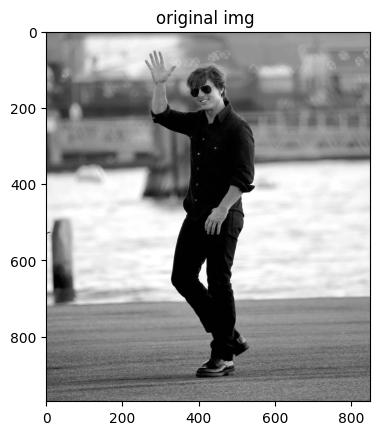

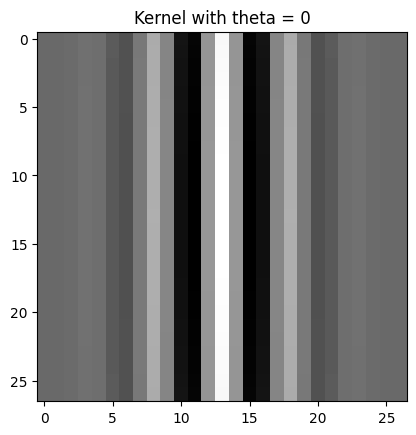

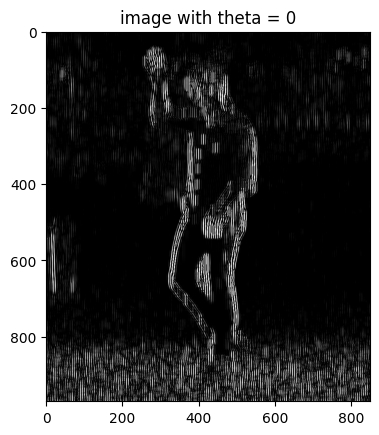

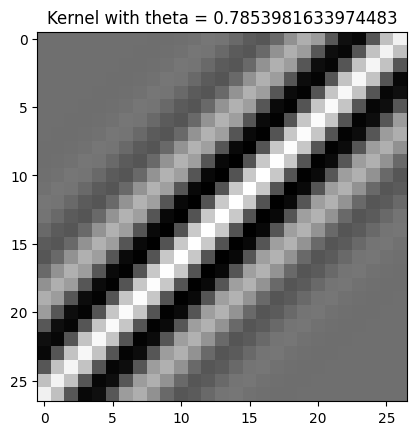

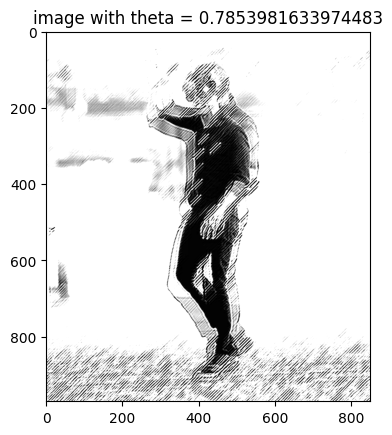

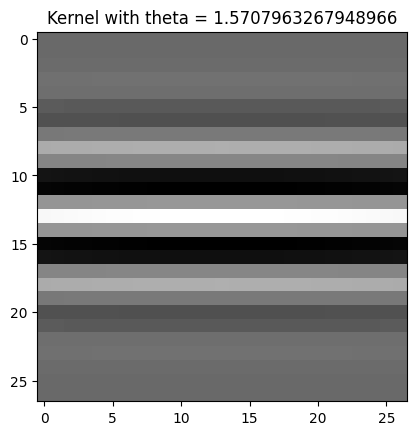

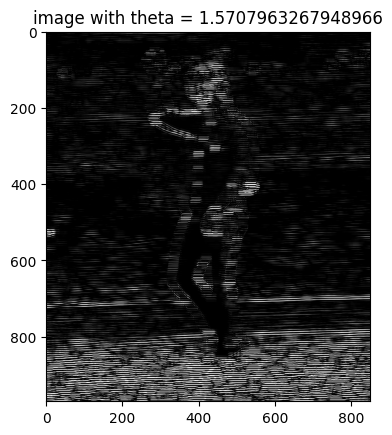

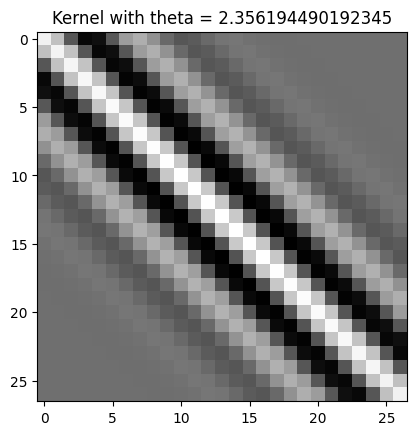

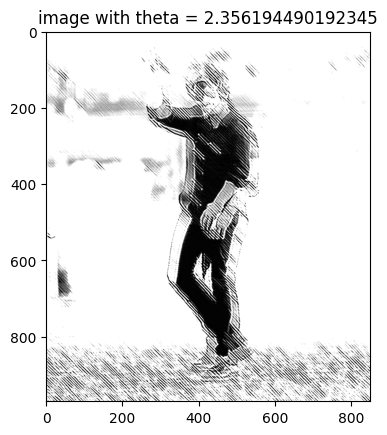

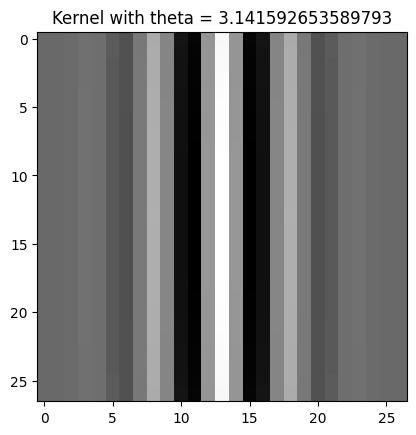

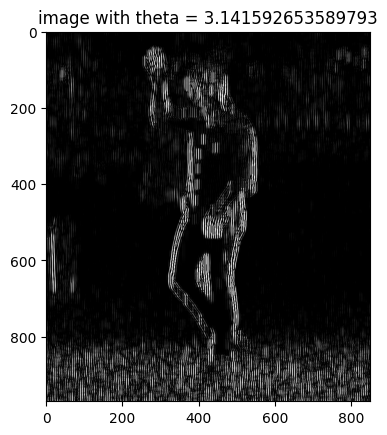

In [34]:
ksize = 26
theta_range = [0, np.pi/4, np.pi/2 ,np.pi/2+np.pi/4,np.pi]
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("original img ")
plt.show()
i=1
for theta in theta_range:
    kern_thet = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 5.0, 0.1, 0,ktype=cv2.CV_32F)
    fimg_thet = cv2.filter2D(img, cv2.CV_8UC3, kern_thet)
    plt.imshow(kern_thet, cmap='gray')
    plt.title("Kernel with theta = "+str(theta))
    plt.show()
    plt.imshow(fimg_thet, cmap='gray')
    plt.title("image with theta = "+str(theta))
    plt.show()
    i=i+1




در تصاویر بالا هم تصویر کرنل و هم تصویر ما پس از عبور از این فیلتر را مشاهده میکنیم که همه پارامتر ها ثابت هستند و زوایا از 0 تا180 تغییر کرده است

در تصاویر بالا میبینیم که خروجی فیلتر جهت کلی زوایای به دست آمده در جهت زاویه فیلتر میباشد

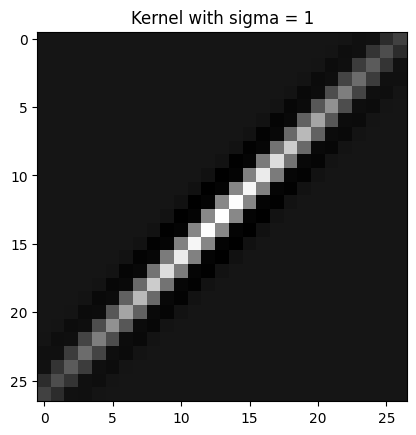

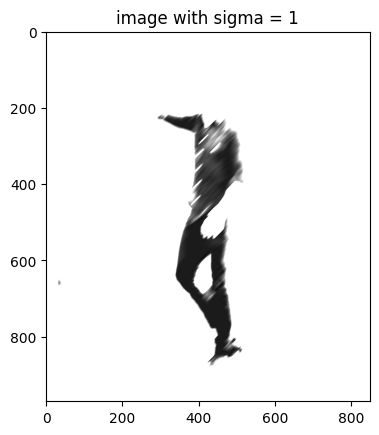

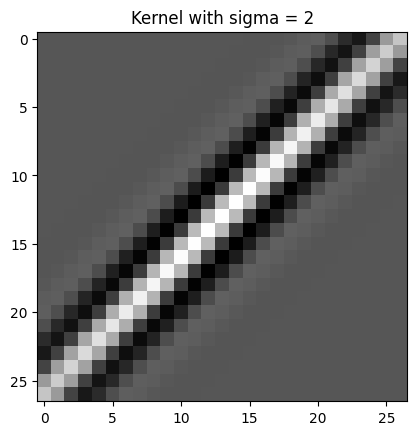

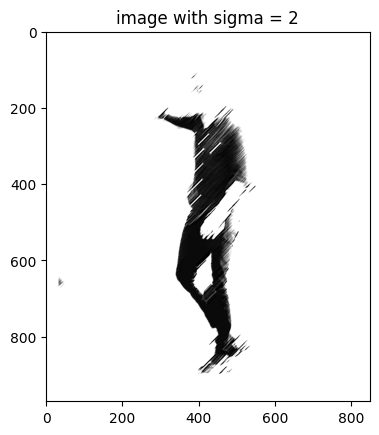

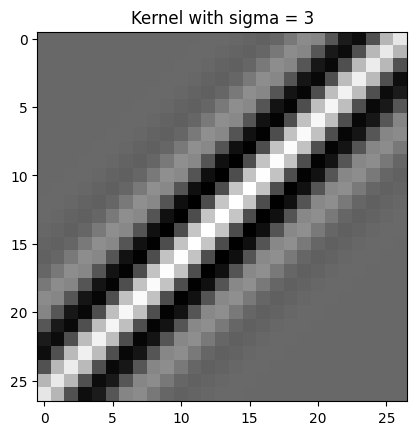

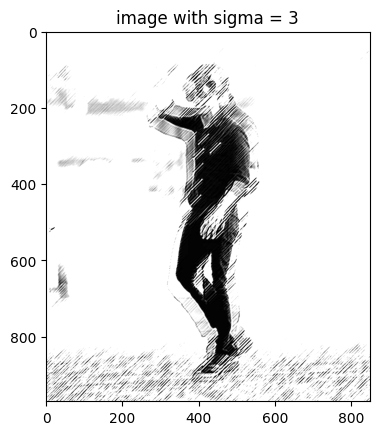

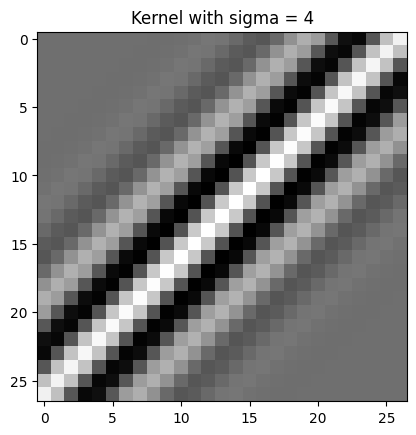

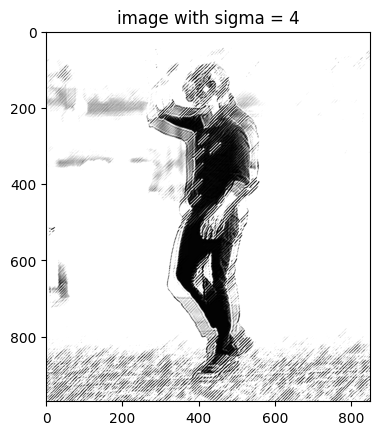

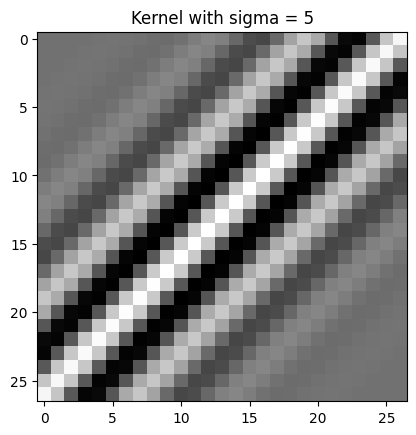

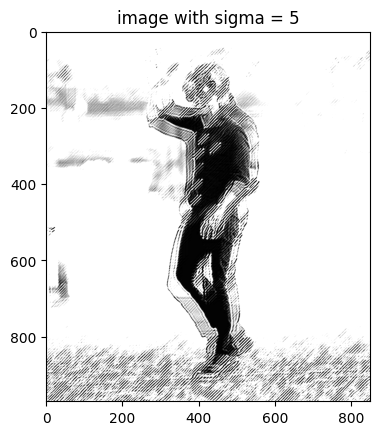

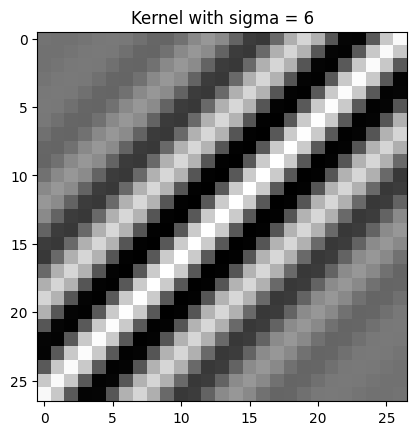

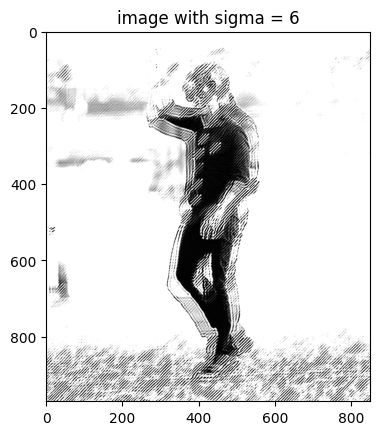

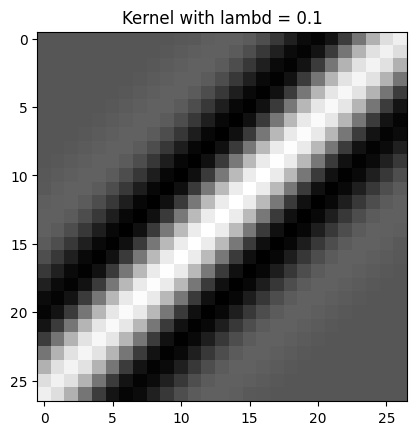

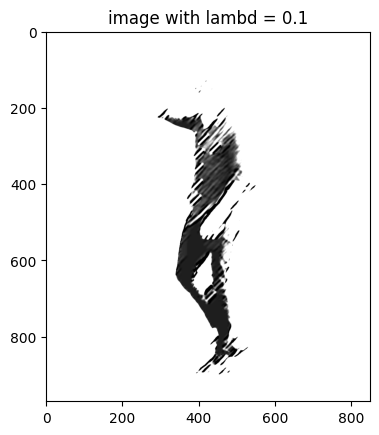

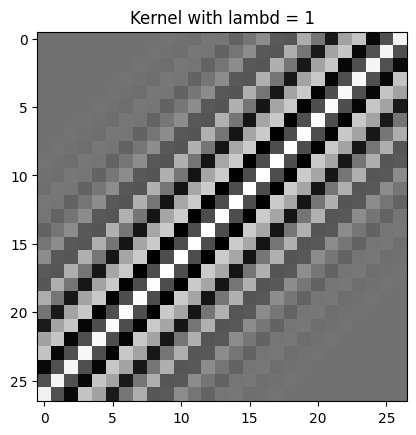

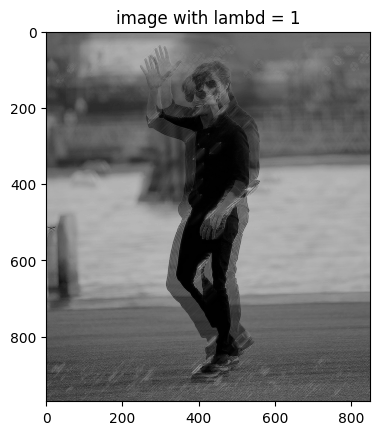

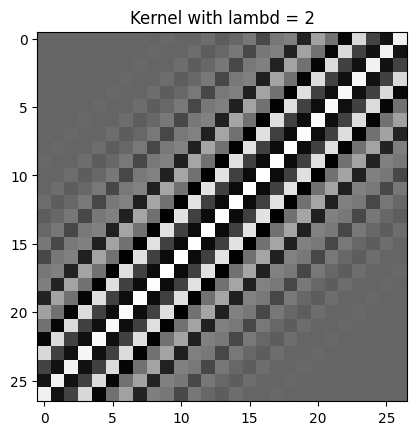

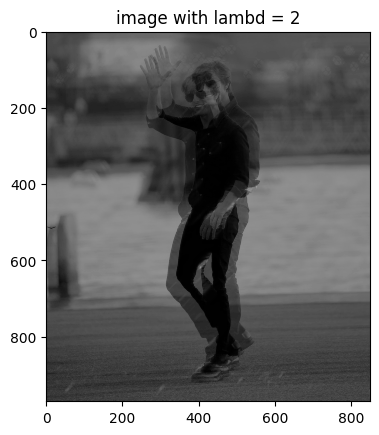

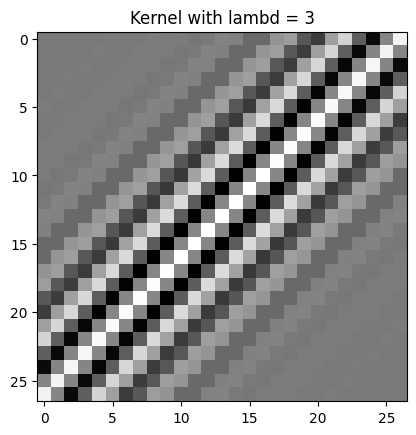

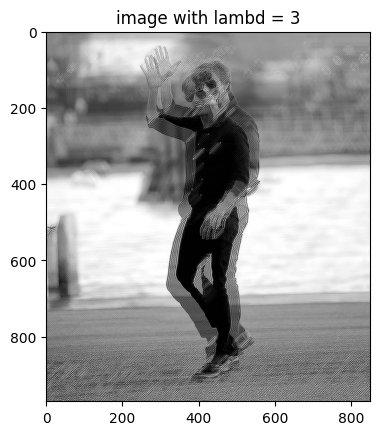

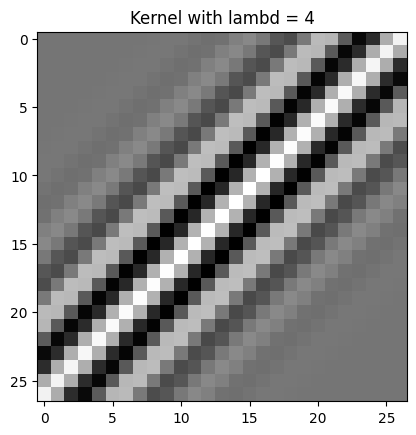

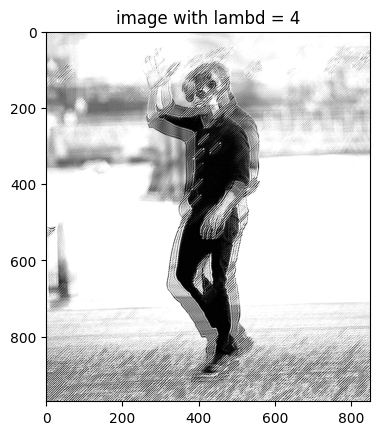

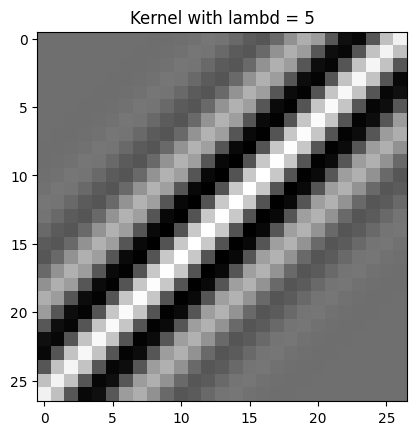

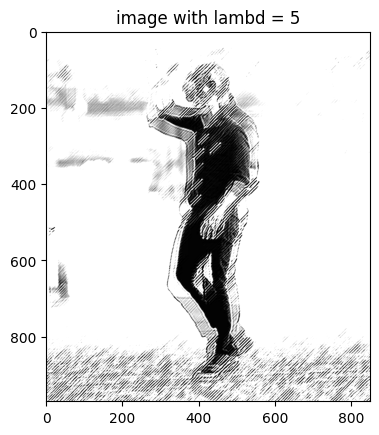

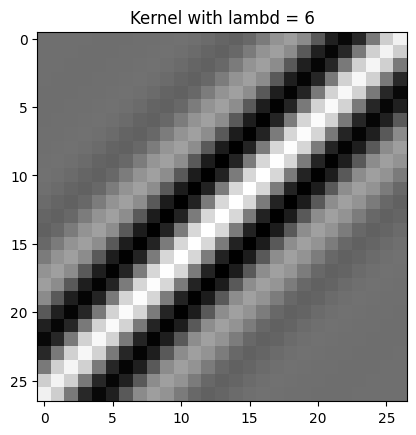

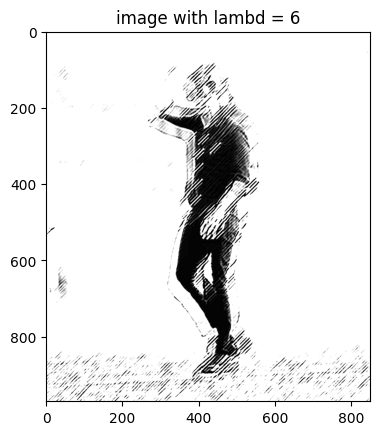

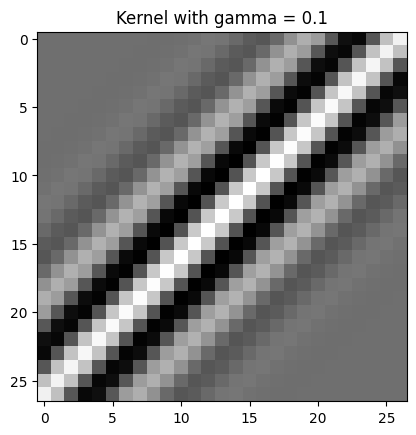

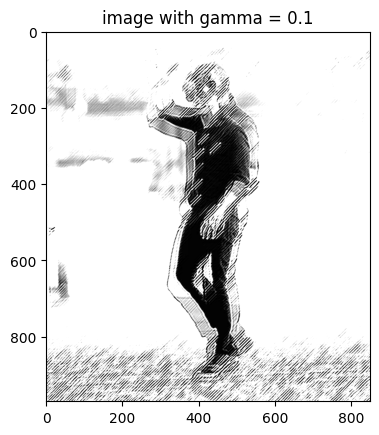

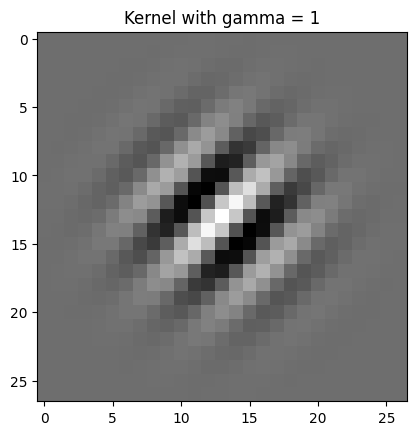

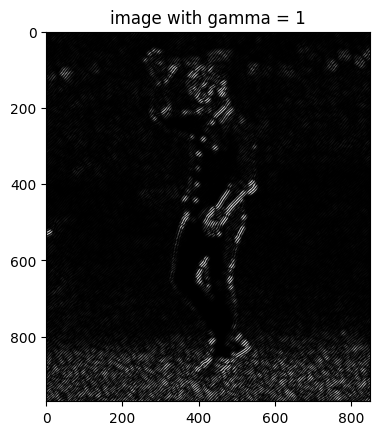

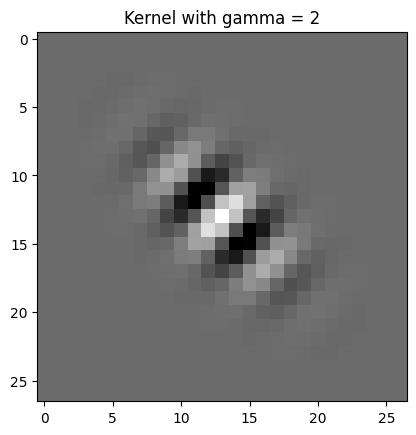

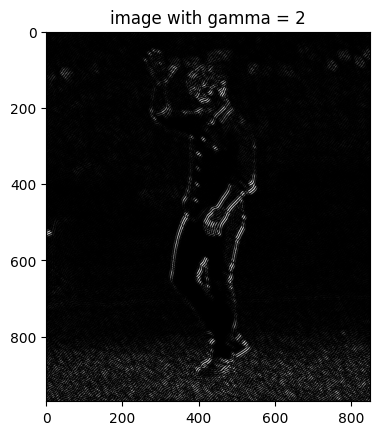

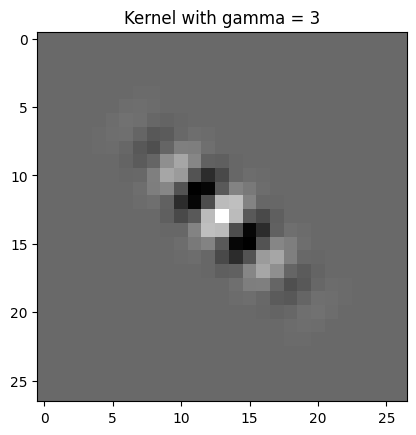

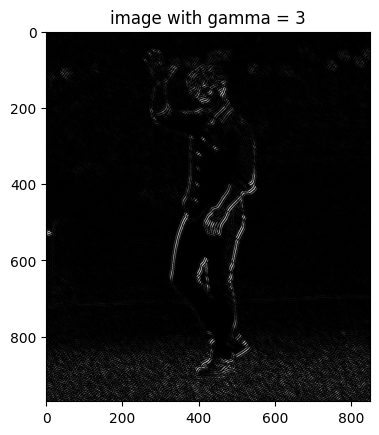

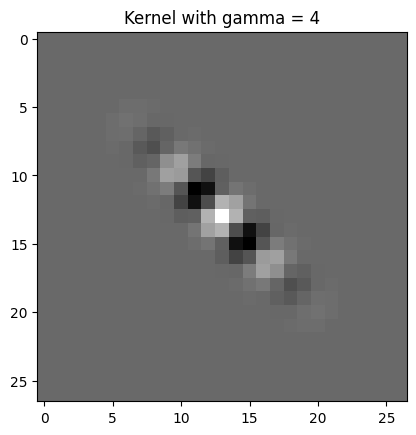

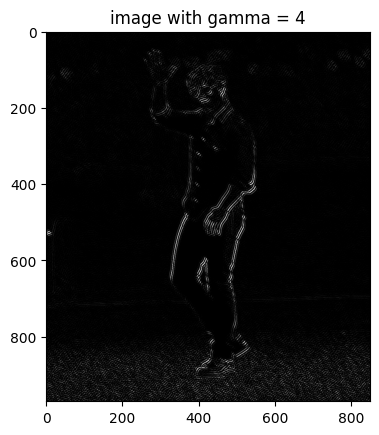

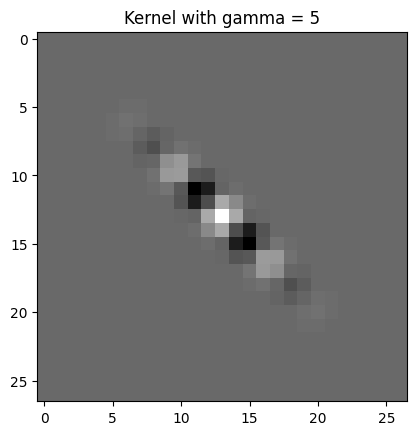

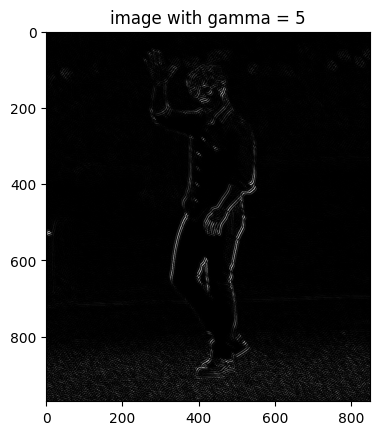

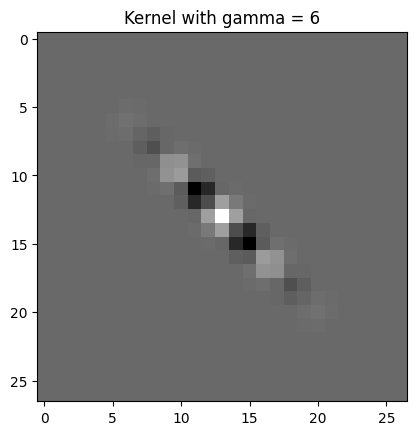

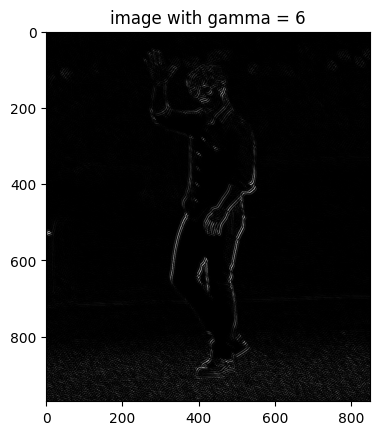

In [37]:
theta=np.pi/4
sigmas=[1, 2 ,3 ,4 ,5 ,6]

for sigma in sigmas:
    kern_thet = cv2.getGaborKernel((ksize, ksize), sigma, theta, 5.0, 0.1, 0,ktype=cv2.CV_32F)
    fimg_thet = cv2.filter2D(img, cv2.CV_8UC3, kern_thet)
    plt.imshow(kern_thet, cmap='gray')
    plt.title("Kernel with sigma = "+str(sigma))
    plt.show()
    plt.imshow(fimg_thet, cmap='gray')
    plt.title("image with sigma = "+str(sigma))
    plt.show()

lambdas=[0.1,1, 2, 3, 4, 5, 6]
for lambd in lambdas:
    kern_thet = cv2.getGaborKernel((ksize, ksize), 4, theta, lambd, 0.1, 0,ktype=cv2.CV_32F)
    fimg_thet = cv2.filter2D(img, cv2.CV_8UC3, kern_thet)
    plt.imshow(kern_thet, cmap='gray')
    plt.title("Kernel with lambd = "+str(lambd))
    plt.show()
    plt.imshow(fimg_thet, cmap='gray')
    plt.title("image with lambd = "+str(lambd))
    plt.show()

gammas=[0.1,1, 2, 3, 4, 5, 6]
for gamma in gammas:
    kern_thet = cv2.getGaborKernel((ksize, ksize), 4, theta, 5, gamma, 0,ktype=cv2.CV_32F)
    fimg_thet = cv2.filter2D(img, cv2.CV_8UC3, kern_thet)
    plt.imshow(kern_thet, cmap='gray')
    plt.title("Kernel with gamma = "+str(gamma))
    plt.show()
    plt.imshow(fimg_thet, cmap='gray')
    plt.title("image with gamma = "+str(gamma))
    plt.show()




میبینیم هرچه مقدار سیگما کمتر میشود فیلتر ما تیز تر میشود و در خروجی تغییرات زیادی نداریم و  هرچه مقدار سیگما بزرگتر میشود تغییرات ما نرم تر میشود و در خروجی بخش بیشتری از تصویر استخراج میشود
همچنین هرچه لامبدا را بیشتر میکنیم باز هم فیلتر کوچکتر میشود و تغییراتکمتری در خروجی مشاهده میکنیم یعنی بیشتر تصویر به صورت سفید در می آید
همچنین مقدار گاما را هرچقدر بیشتر میکنیم فیلتر ما به جای تمام گذر بیشتر شبیه خط میشود در جهت زاویه فیلتر پس خروجی فیلتر بیشتر تیز تر میشود و لبه ها را میدهد.

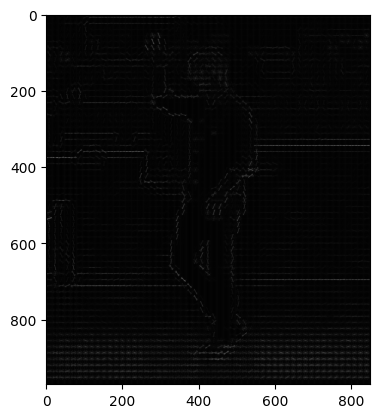

In [ ]:
hog1, hog_img = hog(img,pixels_per_cell=(16,16),cells_per_block=(2,2),orientations=9,visualize=True)
scaler2 = StandardScaler()
scaler2.fit(hog_img)
hog_img1=scaler2.transform(hog_img)
plt.figure()
plt.imshow(hog_img1, cmap='gray')

تصویر داده شده را در بالا به کمک hog  فیلتر کردیم.

In [ ]:
hog_img.shape

(970, 849)

In [ ]:
hog_img=scaler.fit(hog_img)
hog_img=scaler.transform(hog_img)

In [19]:

with zipfile.ZipFile('/content/disgust-20231011T075632Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('disgust')

with zipfile.ZipFile('/content/happy-20231011T075633Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall('happy')



circle = np.zeros((600, 300), dtype = "uint8")

cv_img_happy = []
path = '/content/happy/happy/*.png'
for img in glob.glob(path):
    n= cv2.imread(img)
    cv_img_happy.append(cv2.bitwise_and(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY), circle))
cv_img_disgust = []
path = '/content/disgust/disgust/*.png'
for img in glob.glob(path):
    n= cv2.imread(img)
    cv_img_disgust.append(cv2.bitwise_and(cv2.cvtColor(n, cv2.COLOR_BGR2GRAY), circle))
X_hap_train, X_hap_test, y_hap_train, y_hap_test = train_test_split(cv_img_happy, np.zeros(len(cv_img_happy)), test_size=(len(cv_img_happy)-65)/len(cv_img_happy), random_state=42)
X_dis_train, X_dis_test, y_dis_train, y_dis_test = train_test_split(cv_img_disgust, np.zeros(len(cv_img_disgust))+1, test_size=(len(cv_img_disgust)-35)/len(cv_img_disgust), random_state=42)


X_hap_train=np.array(X_hap_train)
X_hap_test=np.array(X_hap_test)
X_dis_train=np.array(X_dis_train)
X_dis_test=np.array(X_dis_test)
X_hap_train=X_hap_train.reshape(len(X_hap_train),-1)
X_hap_test=X_hap_test.reshape(len(X_hap_test),-1)
X_dis_train=X_dis_train.reshape(len(X_dis_train),-1)
X_dis_test=X_dis_test.reshape(len(X_dis_test),-1)
X_train=np.concatenate((X_hap_train,X_dis_train), axis=0)
X_test=np.concatenate((X_hap_test,X_dis_test),axis=0)
y_test=np.concatenate((y_hap_test,y_dis_test),axis=0)
y_train=np.concatenate((y_hap_train,y_dis_train),axis=0)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

در قسمت بالا دیتا های گفته شده را لود کردیم و داده های ترین و تست را جدا کردیم

In [47]:
train_feature=[]
test_feature=[]
for i in (X_train):
  hog1=hog(np.asmatrix(i).reshape(600,300),pixels_per_cell=(8,8),cells_per_block=(3,3),orientations=9)
  train_feature.append(hog1)

for i in (X_test):
  hog1=hog(np.asmatrix(i).reshape(600,300),pixels_per_cell=(8,8),cells_per_block=(3,3),orientations=9)
  test_feature.append(hog1)

تصاویر را از فیلتر hog   عبور دادیم

In [51]:




#parameters = {'gamma':np.logspace(-2, 10, 13), 'C':np.logspace(-9, 3, 13),'kernel':['linear','poly','rbf','sigmoid']}
parameters = {'C':np.logspace(-3, 3, 7),'gamma':np.logspace(-2, 10, 13)}
svc = SVC(kernel = 'rbf')
clfcv = GridSearchCV(svc, parameters)
clfcv.fit(train_feature, y_train)
#print(clfcv.best_params_)
best_gamma=clfcv.best_params_['gamma']
best_C=clfcv.best_params_['C']
#best_ker=clfcv.best_params_['kernel']



KeyboardInterrupt: ignored

در این قسمت با دیتای ترین بهترین پارامتر های گامما و سی را پیدا کردیم روش گرید سرچ

In [ ]:
best_C

In [ ]:
best_gamma

In [41]:
clf =  SVC(kernel = 'rbf', decision_function_shape = 'ovr', C =best_C ,gamma = best_gamma)
clf.fit(train_feature, y_train)
y_train_p = clf.predict(train_feature)
y_test_p = clf.predict(test_feature)
e=(np.sum(y_test_p != y_test))/len(y_test)
print(e)

0.375


و در این قسمت میزان خطای دیتا تست را مشاهده میکنیم

In [50]:
from sklearn import svm
clf = svm.LinearSVC(C=1)
clf.fit(train_feature,y_train)
score_test=clf.score(test_feature,y_test)
score_train=clf.score(train_feature,y_train)
print('train score: ',score_train)
print('test score: ',score_test)

train score:  0.65
test score:  0.625


در قسمت بالا  مقدار دقت ترین و تست را با هم داریم